In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#initializing inputs
np.random.seed(1)
X= np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
y=np.array([[0],
   [1],
   [1],
   [0]])
syn0=2*np.random.random((3,4))-1
syn1=2*np.random.random((4,1))-1


In [53]:
#sigmoid function
def sigmoidDerivative(value, deriv=False):

    if deriv==True:
        return value*(1-value)
    return 1/(1+np.exp(-value))

In [64]:
l=[]
for i in range(60000):
    l0=X
    l1=sigmoidDerivative(np.dot(l0, syn0))
    l2=sigmoidDerivative(np.dot(l1,syn1))
    
    
    l2_error=y-l2
    if i%10000==0:
        err=np.mean(np.abs(l2_error))
        print('error: {}'.format(err))
        l.append(err)
    l2_delta=l2_error*sigmoidDerivative(l2, deriv=True)
    
    l1_error=l2_delta.dot(syn1.T)
    
    l1_delta=l1_error*sigmoidDerivative(l1,deriv=True)
    
    syn1+=l1.T.dot(l2_delta)
    syn0+=l0.T.dot(l1_delta)
   
    
    

error: 0.49641003190272537
error: 0.008584525653247152
error: 0.0057894598625078085
error: 0.004629176776769983
error: 0.0039587652802736475
error: 0.0035101225678616783
error: 0.003183502385874826
error: 0.002932306342283071
error: 0.0027315064182105065
error: 0.0025663172400400276


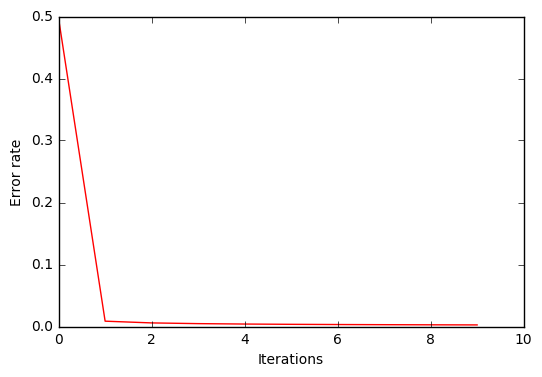

In [76]:
plt.plot(l,'r-')
plt.ylabel('Error rate')
plt.xlabel('Iterations')
plt.axis([0,10,0,.5])
plt.show()